In [1]:
%pip install git+https://gitlab.com/moskalenkoviktor/ml_validation -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

from ml_validation.filters import (Filter, FilterBuilder, MovingAverage,
                                   make_filter)

In [3]:
class SignalBuilder:
    def __init__(self, fs: float, duration: float):
        self._fs = fs
        self._len = int(fs * duration)
        self._arange = np.arange(0, self._len, dtype=np.float32) / fs

    def make(self, sinusoids: list[tuple[float, float]]) -> npt.NDArray[np.float32]:
        x = np.zeros(self._len, dtype=np.float32)
        for fs, amplitude in sinusoids:
            x += amplitude * np.sin(2 * np.pi * fs * self._arange)
        return x

In [4]:
sample_rate = 500

In [5]:
def plot_s_f(signal: npt.NDArray[np.float32], filtered: npt.NDArray[np.float32]) -> None:
    plt.figure(figsize=(15, 3))
    x = np.arange(0, len(signal), dtype=np.float32) / sample_rate
    plt.plot(x, signal, alpha=0.8)
    plt.plot(x, filtered, alpha=0.8)
    plt.legend(["original", "filtered"])


def plot(filter: Filter, sinusoids: list[tuple[float, float]], duration: float = 3) -> None:
    builder = SignalBuilder(sample_rate, duration=duration)
    signal = builder.make(sinusoids)
    filtered = filter(signal)
    plot_s_f(signal, filtered)

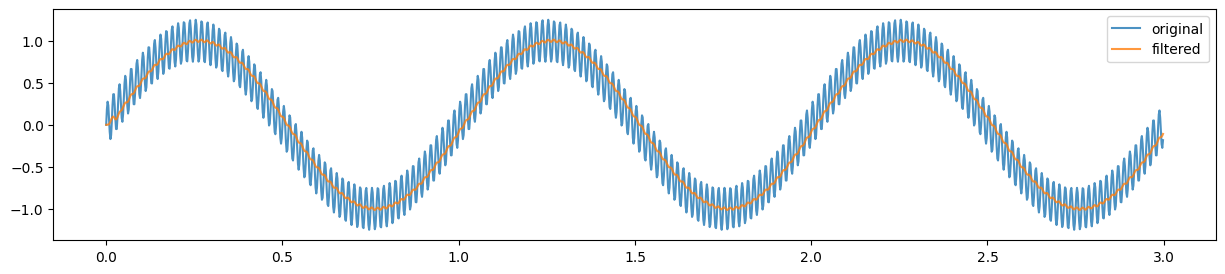

In [6]:
filter = FilterBuilder(sample_rate).lowpass(35).build()
plot(filter, [(1, 1), (60, 0.25)])

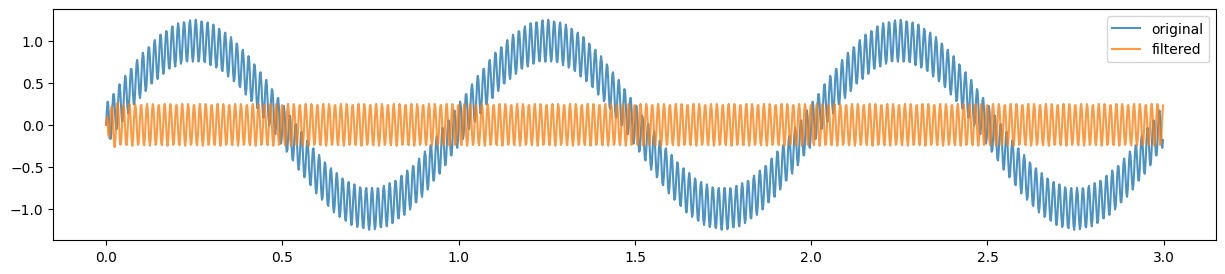

In [7]:
filter = FilterBuilder(sample_rate).highpass(35).build()
plot(filter, [(1, 1), (60, 0.25)])

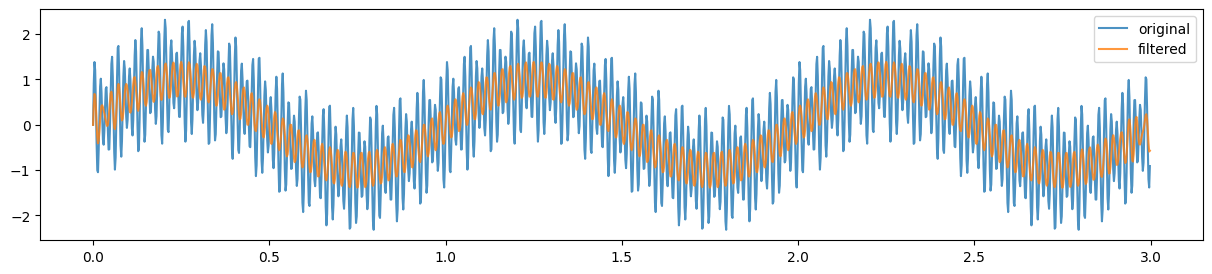

In [8]:
filter = FilterBuilder(sample_rate).notch(60).build()
plot(filter, [(1, 1), (45, 0.4), (60, 1)])

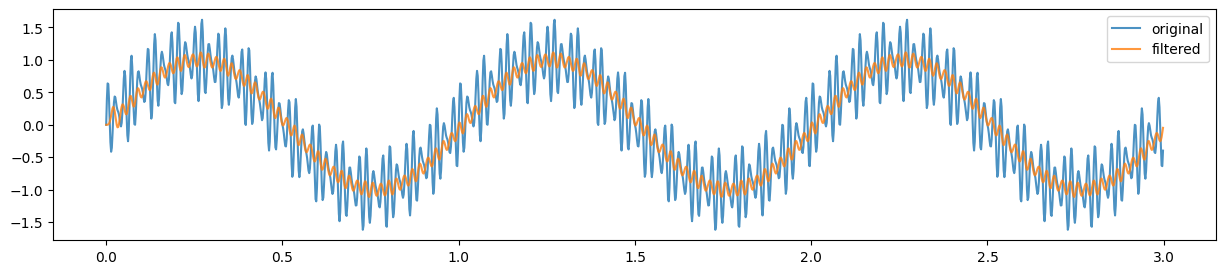

In [9]:
filter = FilterBuilder(sample_rate).lowpass(35).build()
plot(filter, [(1, 1), (45, 0.4), (60, 0.25)])

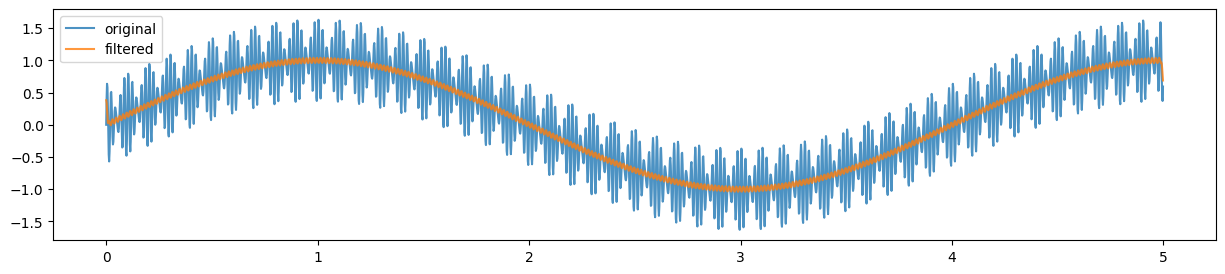

In [10]:
filter = MovingAverage(10)
plot(filter, [(0.25, 1), (50, 0.4), (60, 0.25)], 5)

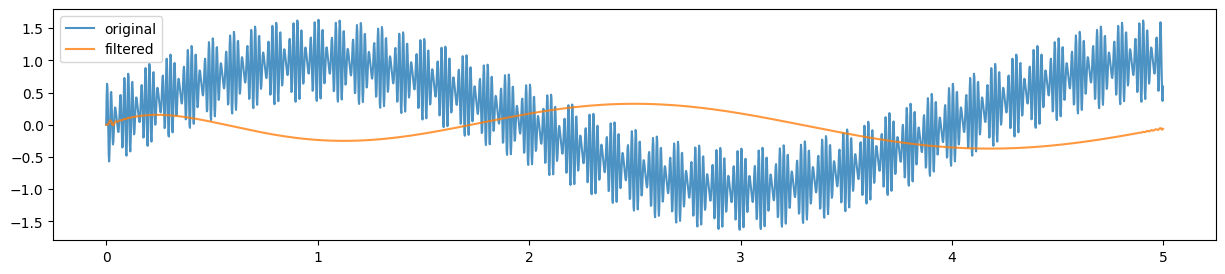

In [11]:
filter = make_filter(sample_rate)
plot(filter, [(0.25, 1), (50, 0.4), (60, 0.25)], 5)